In [2]:
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
from sklearn.metrics import classification_report

In [7]:
import matplotlib.pyplot as plt        

In [8]:
data=pd.read_csv('cancer patient data sets.csv')

In [9]:
data

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


load data from csv file

In [10]:
def load_data(filepath):
    return pd.read_csv(filepath)

preprocess data by removing specific columns and encoding targets

In [11]:
def preprocess_data(data):
    data=data.drop(['index' , 'Patient Id'] ,axis=1)
    X=data.drop('Level',axis=1).values
    y=LabelEncoder().fit_transform(data['Level'].values)
    return X,y

split the data into training and testing sets

In [12]:
def split_data(X,y):
    return train_test_split(X,y,test_size=0.2,random_state=45)

Train The RandomForest classifire

In [13]:
def train_model(X_train,y_train):
    model=RandomForestClassifier(n_estimators=100,random_state=0)
    model.fit(X_train, y_train)
    return model

Predict The test set using the Trained model

In [14]:
def predict(model,X_test):
    return model.predict(X_test)

Print The Classificatio Report

In [15]:
def print_classification_report(y_test,y_pred):
    print(classification_report(y_test,y_pred))

    """Plot the feature importances of the model and annotate each bar."""


In [16]:
def plot_feature_importance(model, feature_names):
    importance = model.feature_importances_
    indices = np.argsort(importance)
    names = [feature_names[i] for i in indices]
    features = pd.DataFrame({"importance": importance, 'indices':indices, 'names': names})
    features = features.sort_values(by='importance', ascending=True)
    ax,fig=plt.subplots(figsize=(20,20))
    bars=plt.barh(features['names'] ,features['importance'],height=0.9,color='rosybrown')
    fig.spines[['right','top','bottom']].set_visible(False)
    fig.xaxis.set_visible(False)
    fig.bar_label(bars,padding=-70,color='white',fontsize=15,label_type='edge')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()


In [17]:
    # Annotate the bars with their numerical values


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        58
           2       1.00      1.00      1.00        72

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



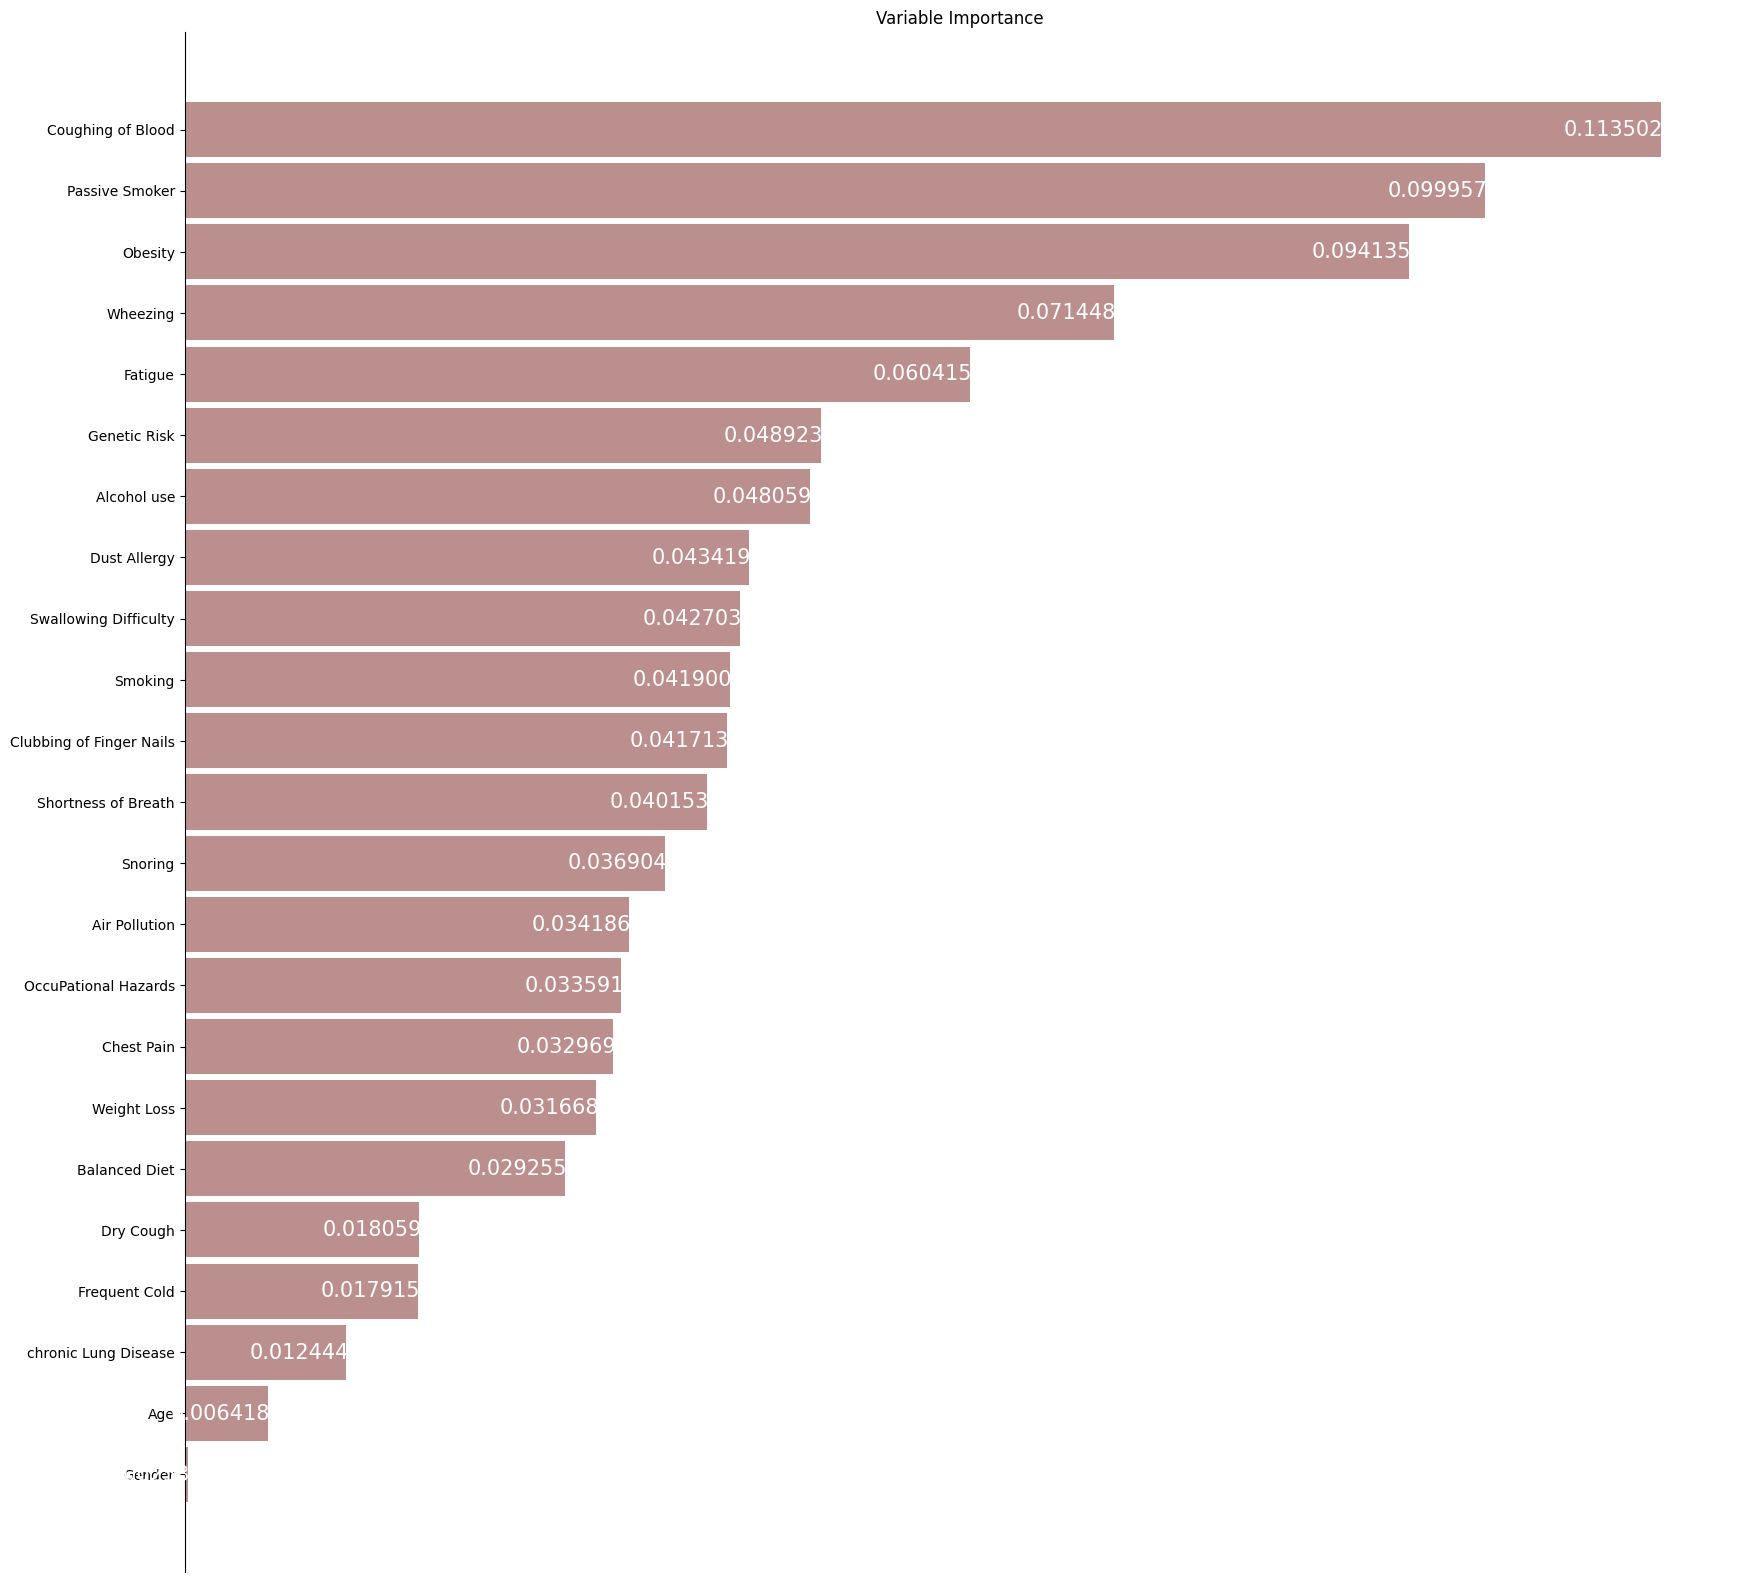

In [19]:
if __name__ == '__main__':
    data = load_data('cancer patient data sets.csv')
    X, y = preprocess_data(data)
    X_train, X_test, y_train, y_test = split_data(X, y)
    
    model = train_model(X_train, y_train)
    y_pred = predict(model, X_test)
    print_classification_report(y_test, y_pred)
    plot_feature_importance(model, data.columns.drop(['Level', 'index', 'Patient Id']))
